# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [31]:
#imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Step 2: Read in your data set 

In [32]:
#Read in data from source 
df = pd.read_csv("../assets/admissions.csv")
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [33]:
df.shape[0]

400

Answer: 400 observations

#### Question 2. Create a summary table

In [34]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

The range of GRE scores is between 220 - 800, while GPA is between 2.26 - 4.00.  The scoring order of magnitude in the GRE is simply 100+ times more.  Therefore resulting in a much higher standard deviation.

#### Question 4. Drop data points with missing data


In [36]:
#Drop missing data and create an updated dataframe
df_new = df.dropna(axis = 0, how = "any")

In [37]:
df_new.shape[0]

397

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We can count the number of missing rows in the orignal set (df_raw) and compare that to the new set (df_new.

In [38]:
#Looks like we have 3 rows of missing data in df:
df.isnull().any(axis=1).sum()

3

In [39]:
#Since we dropped those rows in the previous question, we can confirm the number of missing data is zero in the df_new:
df_new.isnull().any(axis=1).sum()

0

In [40]:
#We can also count the number of rows to ensure we dropped from 
#400 (# of rows in df) to 397 in df_new (removing the 3 with missing data):
df_new.shape[0]

397

#### Question 6. Create box plots for GRE and GPA

In [41]:
df_new.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


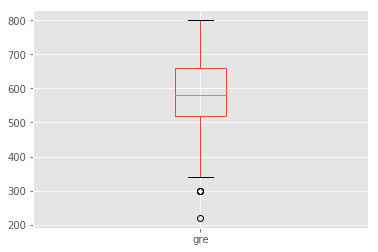

In [45]:
#boxplot 1 - GRE
df_new.gre.plot(kind = 'box')


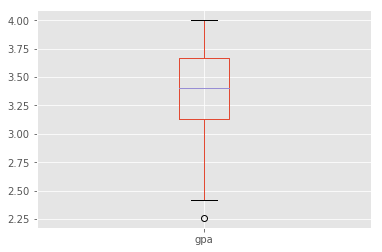

In [46]:
#boxplot 2 - GPA
df_new.gpa.plot(kind = 'box')

#### Question 7. What do this plots show?

Boxplots show median, range, interquartile range, and outlier points if any exist.  Both GRE and GPA boxplots have a few outliers below the smallest value in the normal range.  Based on these plots, median GRE and GPA scores are approximately 580 and 3.40 respectively. 

#### Question 8. Describe each distribution 

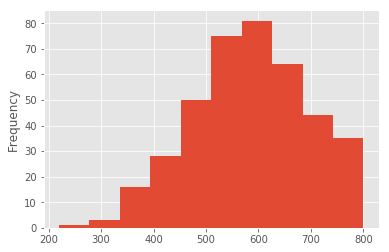

In [49]:
# plot the distribution of each variable 
# There are 3 variables gre, gpa, and prestige
#GRE:
df_new.gre.plot(kind = 'hist')

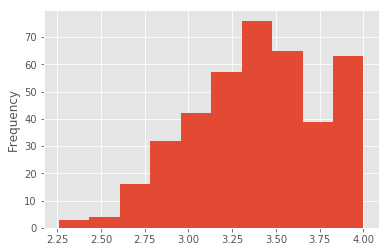

In [50]:
#GPA:
df_new.gpa.plot(kind = 'hist')

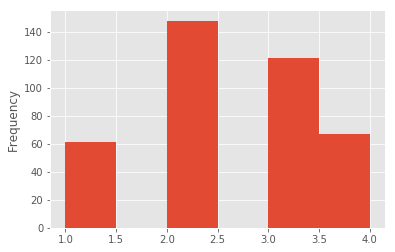

In [64]:
#Prestige
df_new.prestige.plot(kind = 'hist', bins = 6)

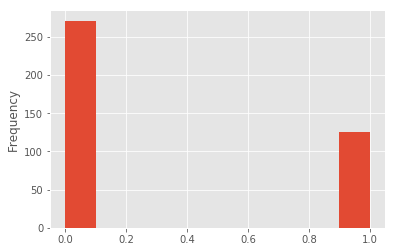

In [67]:
#Admit
df_new.admit.plot(kind = 'hist',)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

No.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Yes, because most of the statistical models we use assume normal distribution datasets. One thing we can do is to remove outliers from the dataset the skewness of the distribution. 

#### Question 11. Which of our variables are potentially colinear? 

In [52]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Although there is no strong level of colinearity between any two variables in our dataset, there is moderate level of colinearity between GRE and GPA scores.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

- Perform Hypothesis testing to determine if statistically significant based on data.  
- Since admit target variable is discrete, we'll implement Chi-squared testing method.

#### Question 14. What is your hypothesis? 

Prestige of school is not a factor whether someone is admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data